## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
path = 'C:/Users/User/Movie Industry Analysis'

In [14]:
# I will use the prepared data set
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_numeric.csv'), index_col = False)

### 2. Data cleaning

In [15]:
df.columns

Index(['year', 'score', 'votes', 'budget', 'gross', 'runtime'], dtype='object')

In [16]:
df.head(20)

,year,score,votes,budget,gross,runtime
0,1980,8.4,927000.0,19000000.0,46998772.0,146.0
1,1980,5.8,65000.0,4500000.0,58853106.0,104.0
2,1980,8.7,1200000.0,18000000.0,538375067.0,124.0
3,1980,7.7,221000.0,3500000.0,83453539.0,88.0
4,1980,7.3,108000.0,6000000.0,39846344.0,98.0
5,1980,6.4,123000.0,550000.0,39754601.0,95.0
6,1980,7.9,188000.0,27000000.0,115229890.0,133.0
7,1980,8.2,330000.0,18000000.0,23402427.0,129.0
8,1980,6.8,101000.0,54000000.0,108185706.0,127.0
9,1980,7.0,10000.0,10000000.0,15795189.0,100.0


In [17]:
df.shape

(7574, 6)

##### Missing values

In [18]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

year       0
score      0
votes      0
budget     0
gross      0
runtime    0
dtype: int64

##### Duplicates check

In [19]:
dups = df.duplicated()

In [20]:
dups.shape # No dups

(7574,)

##### Extreme values checks

C:\Users\User\AppData\Local\Temp\ipykernel_5880\3139161937.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['votes'], bins=25) # Shows extreme values


<Axes: xlabel='votes', ylabel='Density'>

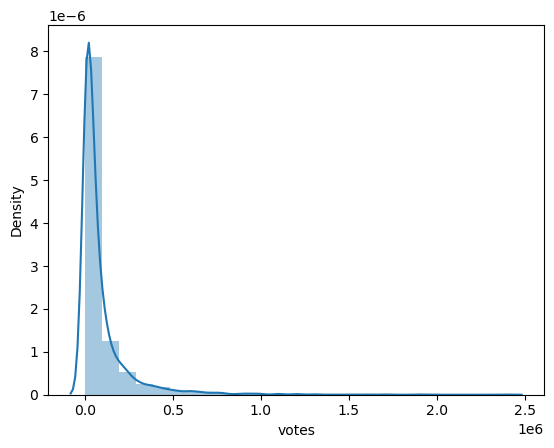

In [21]:
sns.distplot(df['votes'], bins=25) # Shows extreme values

In [22]:
# There are some outliers, so I will delete them

df = df[df['votes'] <=1000000] 

In [23]:
df['score'].mean() # Check the mean

6.378904073238689

In [24]:
df['score'].median() # Check the median

6.5

In [25]:
df['score'].max() # Check the max

8.6

### 3. Data prep for regression analysis 

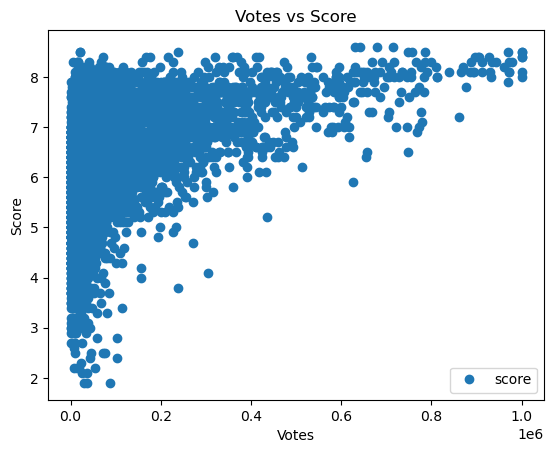

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'votes', y='score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Votes vs Score')  
plt.xlabel('Votes')  
plt.ylabel('Score')  
plt.show()

### My hypothesis is: the more VOTES a movie gets the higher its SCORE will be. 

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['votes'].values.reshape(-1,1)
y = df['score'].values.reshape(-1,1)

In [28]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [29]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [30]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

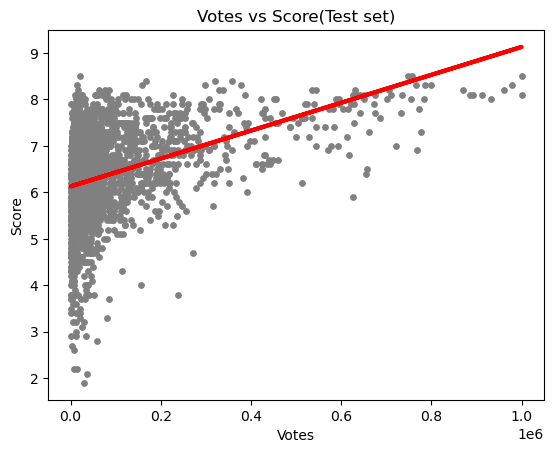

In [32]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Votes vs Score(Test set)')
plot_test.xlabel('Votes')
plot_test.ylabel('Score')
plot_test.show()

###  We can see that the regression line signifiantly well appears to fit the data 

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.00031816e-06]]
Mean squared error:  0.7995234238215563
R2 score:  0.14991422262667642


In [35]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7.9,6.445306
1,7.0,6.166276
2,6.7,6.226283
3,7.2,6.149175
4,6.6,6.568319
5,7.4,6.193279
6,6.8,6.199280
7,7.1,6.256286
8,6.4,6.358297
9,6.0,6.157275


##### Compare how the regression fits the training set

In [36]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [37]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.00031816e-06]]
Mean squared error:  0.7572727709915553
R2 score:  0.16809592313728305


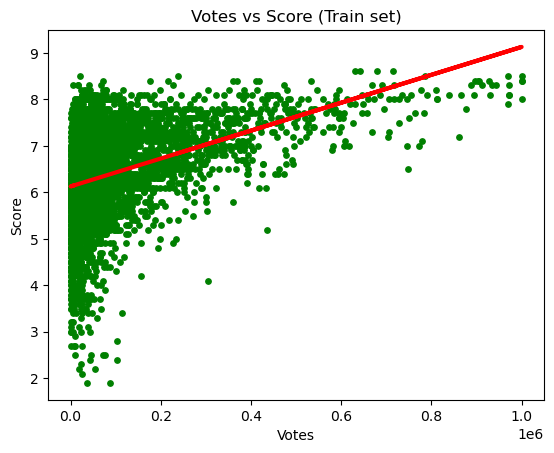

In [39]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Votes vs Score (Train set)')
plot_test.xlabel('Votes')
plot_test.ylabel('Score')
plot_test.show()